# 🧬 Predicting Disease Risk from Daily Habits

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set display option to show all columns
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("disease_risk.csv")
df

,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,screen_time,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target
0,95395,22,Female,162.932524,67.564516,25.450898,25.450898,76.352693,25.343248,97.087870,132.151511,99.337130,189.196300,108.626249,15.046376,6.876157,Excellent,10.422726,3.111490,8368.383309,1850.596805,97.463847,NaN,Light,2.973462,2.921232,5,10,No,Master,Labor,Farmer,2857.320235,Keto,Cardio,High,Poor,Yes,Low,2,NaN,No,No,0,1.0,5.5,1.336250,healthy
1,5448,47,Female,171.547964,52.804671,17.943254,17.943254,53.829762,18.053942,95.888834,116.171940,67.499438,195.072178,120.528981,8.255944,6.456177,Fair,7.787357,3.231989,7938.704919,1864.938695,51.709036,Occasionally,Non-smoker,1.259687,4.832610,4,3,Yes,Bachelor,Healthcare,Farmer,6548.228475,Vegan,Cardio,Moderate,Poor,No,High,3,NaN,Yes,Yes,0,1.0,5.5,1.180061,diseased
2,73751,55,Female,170.966555,44.804159,15.328371,15.328371,45.985114,15.296274,77.344088,127.030570,63.610472,159.772494,99.224745,15.843748,7.320258,Fair,6.544831,6.138907,5673.534557,1759.140043,38.845329,Regularly,Heavy,2.316328,4.982927,0,9,No,Bachelor,Tech,Teacher,2549.965306,Keto,Mixed,High,Good,Yes,High,2,NaN,No,Yes,0,1.0,5.5,2.321793,diseased
3,58660,27,Female,178.287821,40.000000,12.583940,12.583940,37.751820,12.643315,61.743057,123.106043,91.380544,212.788297,75.391804,4.965942,4.487325,Poor,8.634154,1.934497,6233.281463,2291.912789,54.846048,NaN,Light,2.502264,10.780279,4,0,No,Bachelor,Unemployed,Farmer,2322.460226,Vegetarian,NaN,Low,Good,No,Moderate,3,High,Yes,Yes,0,1.0,5.5,-3.495835,diseased
4,57504,24,Female,194.568973,84.264569,22.258599,22.258599,66.775798,22.513544,91.287708,130.915270,64.180530,197.776095,93.184091,NaN,3.511518,Good,4.874924,4.135976,10956.957845,2386.572024,83.220557,NaN,Non-smoker,2.174174,5.453455,5,2,No,Bachelor,Unemployed,Teacher,4742.466750,Vegan,Cardio,High,Poor,No,High,4,NaN,Yes,No,0,1.0,5.5,-4.914426,healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,25307,53,Male,162.682355,89.601849,33.856033,33.856033,101.568100,34.004342,89.488454,129.380077,76.063089,198.522946,81.855581,11.018841,8.087586,Good,7.176379,2.398722,8514.470177,2343.205984,51.156766,Occasionally,Non-smoker,2.989209,7.415820,2,3,No,Bachelor,Tech,Engineer,877.435530,Vegetarian,Cardio,Moderate,Good,Yes,Low,4,NaN,No,No,0,1.0,5.5,5.154871,diseased
29996,17448,23,Male,160.250212,67.624275,26.333307,26.333307,78.999920,26.381995,87.209088,100.658001,65.561732,220.064925,146.131691,17.212978,9.842056,Fair,5.832487,4.131165,6800.657789,2381.888802,42.161263,NaN,Heavy,2.366341,7.491023,10,8,No,Bachelor,Unemployed,Artist,5407.141861,Vegan,NaN,Low,Moderate,No,High,1,NaN,Yes,No,0,1.0,5.5,-8.199162,healthy
29997,10896,68,Male,174.657371,61.878333,20.284522,20.284522,60.853565,20.509179,79.151644,114.879480,61.500441,250.293758,105.553492,NaN,9.021386,Good,5.583392,0.656181,5931.188675,1741.230691,23.744050,Occasionally,Light,1.521417,7.955565,10,9,Yes,High School,Tech,Driver,2464.960044,Vegan,Strength,Moderate,Moderate,Yes,High,3,Moderate,Yes,Yes,0,1.0,5.5,5.205425,healthy
29998,22545,73,Male,168.392397,46.486714,16.393961,16.393961,49.181883,16.291237,71.186494,NaN,79.535017,187.587866,117.829075,20.562741,5.467089,Fair,8.705341,3.092682,10499.236717,2134.074080,45.629988,NaN,Light,1.914931,10.511659,1,9,No,Master,Labor,Engineer,7588.911079,Vegan,Na

In [4]:
df.head()

,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,screen_time,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target
0,95395,22,Female,162.932524,67.564516,25.450898,25.450898,76.352693,25.343248,97.087870,132.151511,99.337130,189.196300,108.626249,15.046376,6.876157,Excellent,10.422726,3.111490,8368.383309,1850.596805,97.463847,NaN,Light,2.973462,2.921232,5,10,No,Master,Labor,Farmer,2857.320235,Keto,Cardio,High,Poor,Yes,Low,2,NaN,No,No,0,1.0,5.5,1.336250,healthy
1,5448,47,Female,171.547964,52.804671,17.943254,17.943254,53.829762,18.053942,95.888834,116.171940,67.499438,195.072178,120.528981,8.255944,6.456177,Fair,7.787357,3.231989,7938.704919,1864.938695,51.709036,Occasionally,Non-smoker,1.259687,4.832610,4,3,Yes,Bachelor,Healthcare,Farmer,6548.228475,Vegan,Cardio,Moderate,Poor,No,High,3,NaN,Yes,Yes,0,1.0,5.5,1.180061,diseased
2,73751,55,Female,170.966555,44.804159,15.328371,15.328371,45.985114,15.296274,77.344088,127.030570,63.610472,159.772494,99.224745,15.843748,7.320258,Fair,6.544831,6.138907,5673.534557,1759.140043,38.845329,Regularly,Heavy,2.316328,4.982927,0,9,No,Bachelor,Tech,Teacher,2549.965306,Keto,Mixed,High,Good,Yes,High,2,NaN,No,Yes,0,1.0,5.5,2.321793,diseased
3,58660,27,Female,178.287821,40.000000,12.583940,12.583940,37.751820,12.643315,61.743057,123.106043,91.380544,212.788297,75.391804,4.965942,4.487325,Poor,8.634154,1.934497,6233.281463,2291.912789,54.846048,NaN,Light,2.502264,10.780279,4,0,No,Bachelor,Unemployed,Farmer,2322.460226,Vegetarian,NaN,Low,Good,No,Moderate,3,High,Yes,Yes,0,1.0,5.5,-3.495835,diseased
4,57504,24,Female,194.568973,84.264569,22.258599,22.258599,66.775798,22.513544,91.287708,130.915270,64.180530,197.776095,93.184091,NaN,3.511518,Good,4.874924,4.135976,10956.957845,2386.572024,83.220557,NaN,Non-smoker,2.174174,5.453455,5,2,No,Bachelor,Unemployed,Teacher,4742.466750,Vegan,Cardio,High,Poor,No,High,4,NaN,Yes,No,0,1.0,5.5,-4.914426,healthy


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   survey_code               30000 non-null  int64  
 1   age                       30000 non-null  int64  
 2   gender                    30000 non-null  object 
 3   height                    30000 non-null  float64
 4   weight                    30000 non-null  float64
 5   bmi                       30000 non-null  float64
 6   bmi_estimated             30000 non-null  float64
 7   bmi_scaled                30000 non-null  float64
 8   bmi_corrected             30000 non-null  float64
 9   waist_size                30000 non-null  float64
 10  blood_pressure            27679 non-null  float64
 11  heart_rate                25736 non-null  float64
 12  cholesterol               30000 non-null  float64
 13  glucose                   30000 non-null  float64
 14  insuli

In [6]:
df = df.drop('survey_code', axis=1)
df

,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,screen_time,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target
0,22,Female,162.932524,67.564516,25.450898,25.450898,76.352693,25.343248,97.087870,132.151511,99.337130,189.196300,108.626249,15.046376,6.876157,Excellent,10.422726,3.111490,8368.383309,1850.596805,97.463847,NaN,Light,2.973462,2.921232,5,10,No,Master,Labor,Farmer,2857.320235,Keto,Cardio,High,Poor,Yes,Low,2,NaN,No,No,0,1.0,5.5,1.336250,healthy
1,47,Female,171.547964,52.804671,17.943254,17.943254,53.829762,18.053942,95.888834,116.171940,67.499438,195.072178,120.528981,8.255944,6.456177,Fair,7.787357,3.231989,7938.704919,1864.938695,51.709036,Occasionally,Non-smoker,1.259687,4.832610,4,3,Yes,Bachelor,Healthcare,Farmer,6548.228475,Vegan,Cardio,Moderate,Poor,No,High,3,NaN,Yes,Yes,0,1.0,5.5,1.180061,diseased
2,55,Female,170.966555,44.804159,15.328371,15.328371,45.985114,15.296274,77.344088,127.030570,63.610472,159.772494,99.224745,15.843748,7.320258,Fair,6.544831,6.138907,5673.534557,1759.140043,38.845329,Regularly,Heavy,2.316328,4.982927,0,9,No,Bachelor,Tech,Teacher,2549.965306,Keto,Mixed,High,Good,Yes,High,2,NaN,No,Yes,0,1.0,5.5,2.321793,diseased
3,27,Female,178.287821,40.000000,12.583940,12.583940,37.751820,12.643315,61.743057,123.106043,91.380544,212.788297,75.391804,4.965942,4.487325,Poor,8.634154,1.934497,6233.281463,2291.912789,54.846048,NaN,Light,2.502264,10.780279,4,0,No,Bachelor,Unemployed,Farmer,2322.460226,Vegetarian,NaN,Low,Good,No,Moderate,3,High,Yes,Yes,0,1.0,5.5,-3.495835,diseased
4,24,Female,194.568973,84.264569,22.258599,22.258599,66.775798,22.513544,91.287708,130.915270,64.180530,197.776095,93.184091,NaN,3.511518,Good,4.874924,4.135976,10956.957845,2386.572024,83.220557,NaN,Non-smoker,2.174174,5.453455,5,2,No,Bachelor,Unemployed,Teacher,4742.466750,Vegan,Cardio,High,Poor,No,High,4,NaN,Yes,No,0,1.0,5.5,-4.914426,healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,53,Male,162.682355,89.601849,33.856033,33.856033,101.568100,34.004342,89.488454,129.380077,76.063089,198.522946,81.855581,11.018841,8.087586,Good,7.176379,2.398722,8514.470177,2343.205984,51.156766,Occasionally,Non-smoker,2.989209,7.415820,2,3,No,Bachelor,Tech,Engineer,877.435530,Vegetarian,Cardio,Moderate,Good,Yes,Low,4,NaN,No,No,0,1.0,5.5,5.154871,diseased
29996,23,Male,160.250212,67.624275,26.333307,26.333307,78.999920,26.381995,87.209088,100.658001,65.561732,220.064925,146.131691,17.212978,9.842056,Fair,5.832487,4.131165,6800.657789,2381.888802,42.161263,NaN,Heavy,2.366341,7.491023,10,8,No,Bachelor,Unemployed,Artist,5407.141861,Vegan,NaN,Low,Moderate,No,High,1,NaN,Yes,No,0,1.0,5.5,-8.199162,healthy
29997,68,Male,174.657371,61.878333,20.284522,20.284522,60.853565,20.509179,79.151644,114.879480,61.500441,250.293758,105.553492,NaN,9.021386,Good,5.583392,0.656181,5931.188675,1741.230691,23.744050,Occasionally,Light,1.521417,7.955565,10,9,Yes,High School,Tech,Driver,2464.960044,Vegan,Strength,Moderate,Moderate,Yes,High,3,Moderate,Yes,Yes,0,1.0,5.5,5.205425,healthy
29998,73,Male,168.392397,46.486714,16.393961,16.393961,49.181883,16.291237,71.186494,NaN,79.535017,187.587866,117.829075,20.562741,5.467089,Fair,8.705341,3.092682,10499.236717,2134.074080,45.629988,NaN,Light,1.914931,10.511659,1,9,No,Master,Labor,Engineer,7588.911079,Vegan,NaN,Low,Poor,Yes,High,2,High,Yes,No,0,1.0,5.5,7.205557,healthy


In [7]:
print(df['gender'].value_counts())
print(df['gender'].isna().sum())

gender
Male      15018
Female    14982
Name: count, dtype: int64
0


In [8]:
df.isna().sum()

age                             0
gender                          0
height                          0
weight                          0
bmi                             0
bmi_estimated                   0
bmi_scaled                      0
bmi_corrected                   0
waist_size                      0
blood_pressure               2321
heart_rate                   4264
cholesterol                     0
glucose                         0
insulin                      4783
sleep_hours                     0
sleep_quality                   0
work_hours                      0
physical_activity               0
daily_steps                  2574
calorie_intake                  0
sugar_intake                    0
alcohol_consumption         12816
smoking_level                   0
water_intake                    0
screen_time                     0
stress_level                    0
mental_health_score             0
mental_health_support           0
education_level                 0
job_type      

In [9]:
df['blood_pressure'].describe()

count    27679.000000
mean       120.014711
std         15.053383
min         60.605842
25%        109.823483
50%        120.111696
75%        130.038478
max        182.799505
Name: blood_pressure, dtype: float64

# I. Imputation

1. Blood Pressure

       blood_pressure
count    27679.000000
mean       120.014711
std         15.053383
min         60.605842
25%        109.823483
50%        120.111696
75%        130.038478
max        182.799505
Axes(0.125,0.11;0.775x0.77)


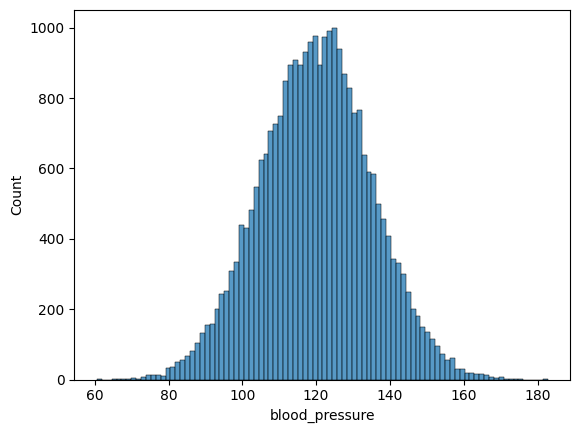

In [10]:
print(pd.DataFrame(df['blood_pressure'].describe()))

print(sns.histplot(data = df, x='blood_pressure'))

In [11]:
df['blood_pressure'] = df['blood_pressure'].fillna(df['blood_pressure'].median())
print(df['blood_pressure'].isna().sum())

0


2. Heart Rate

         heart_rate
count  25736.000000
mean      74.904096
std        9.997813
min       34.745092
25%       68.166687
50%       75.014065
75%       81.642065
max      113.699566
Axes(0.125,0.11;0.775x0.77)


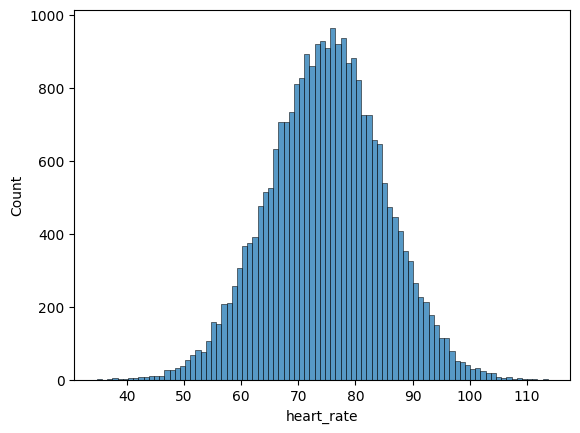

In [12]:
print(pd.DataFrame(df['heart_rate'].describe()))

print(sns.histplot(data = df, x='heart_rate'))

In [13]:
df['heart_rate'] = df['heart_rate'].fillna(df['heart_rate'].median())
print(df['heart_rate'].isna().sum())

0


3. Insulin

            insulin
count  25217.000000
mean      15.015134
std        4.996720
min       -5.227445
25%       11.646032
50%       14.990514
75%       18.389274
max       35.464749
Axes(0.125,0.11;0.775x0.77)


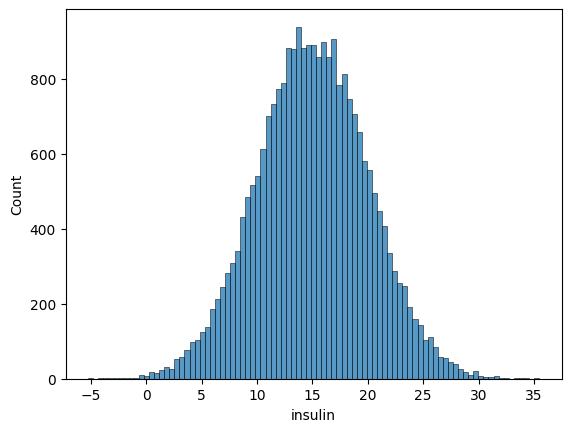

In [14]:
print(pd.DataFrame(df['insulin'].describe()))

print(sns.histplot(data = df, x='insulin'))

In [15]:
df['insulin'] = df['insulin'].fillna(df['insulin'].median())
print(df['insulin'].isna().sum())

0


4. Daily Steps

        daily_steps
count  27426.000000
mean    7009.876664
std     2504.764514
min     1000.000000
25%     5314.420105
50%     7001.373532
75%     8714.414884
max    16521.256223
Axes(0.125,0.11;0.775x0.77)


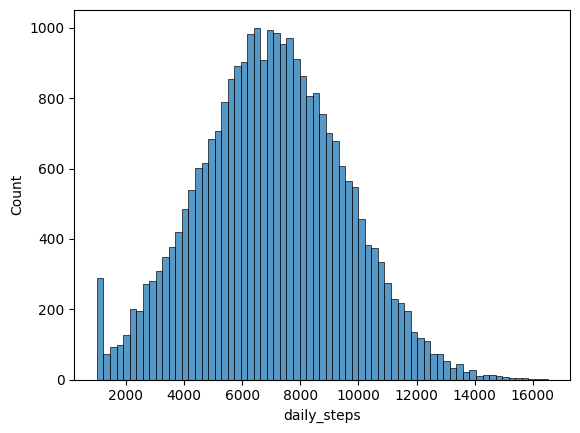

In [16]:
print(pd.DataFrame(df['daily_steps'].describe()))

print(sns.histplot(data = df, x='daily_steps'))

In [17]:
df['daily_steps'] = df['daily_steps'].fillna(5000)
print(df['daily_steps'].isna().sum())

0


5. Income

             income
count  27394.000000
mean    4024.457918
std     1939.868424
min      500.000000
25%     2632.408362
50%     3989.135087
75%     5351.945696
max    11349.443420
Axes(0.125,0.11;0.775x0.77)


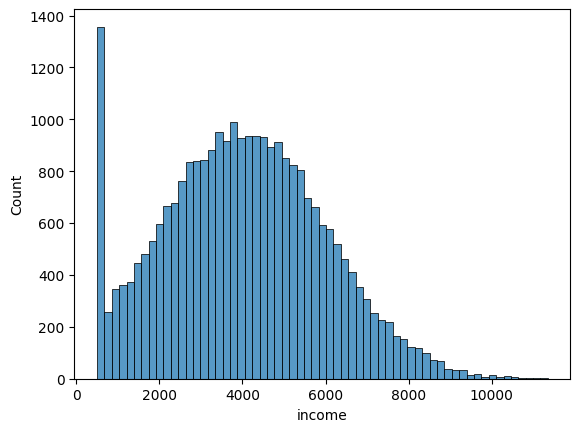

In [18]:
print(pd.DataFrame(df['income'].describe()))

print(sns.histplot(data = df, x='income'))

In [19]:
df['income'] = df['income'].fillna(3500)
print(df['income'].isna().sum())

0


6. Exercise Type

In [20]:
print(pd.DataFrame(df['exercise_type']).value_counts())

exercise_type
Mixed            7520
Strength         7506
Cardio           7424
Name: count, dtype: int64


<Axes: xlabel='exercise_type', ylabel='count'>

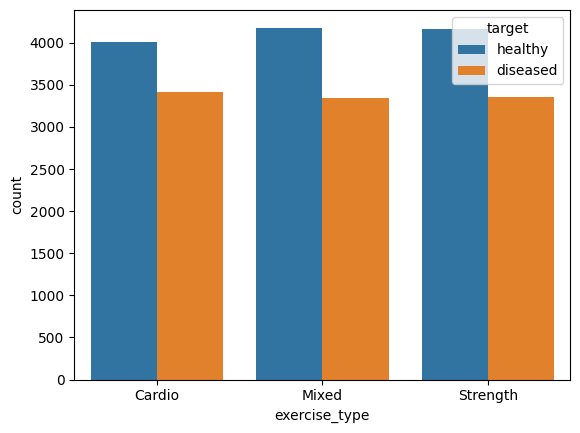

In [21]:
sns.countplot(data=df, x='exercise_type', hue='target')

In [22]:
df['exercise_type'] = df['exercise_type'].fillna(df['exercise_type'].mode()[0])
print(df['exercise_type'].isna().sum())

0


7. Caffeine Intake

In [23]:
print(pd.DataFrame(df['caffeine_intake']).value_counts())

caffeine_intake
Moderate           10022
High                9967
Name: count, dtype: int64


<Axes: xlabel='caffeine_intake', ylabel='count'>

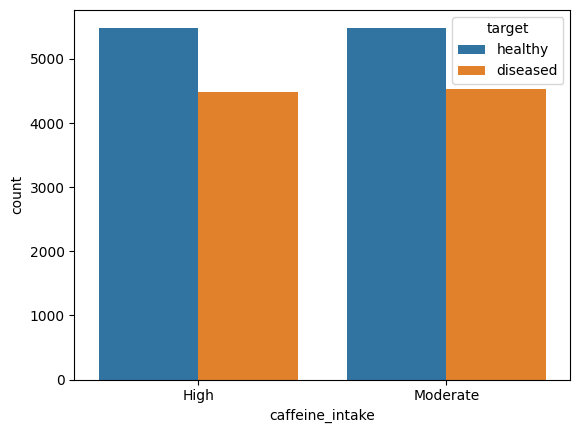

In [24]:
sns.countplot(data=df, x='caffeine_intake', hue='target')

In [25]:
df = df.drop('caffeine_intake', axis =1)

8. Gene Marker Flag

In [26]:
print(pd.DataFrame(df['gene_marker_flag']).value_counts())

gene_marker_flag
1.0                 26860
Name: count, dtype: int64


In [27]:
df = df.drop('gene_marker_flag', axis =1)

9. Alcohol Consumption

In [28]:
print(pd.DataFrame(df['alcohol_consumption']).value_counts())

alcohol_consumption
Occasionally           8620
Regularly              8564
Name: count, dtype: int64


In [29]:
df = df.drop('alcohol_consumption', axis =1)

In [30]:
df.isna().sum()

age                         0
gender                      0
height                      0
weight                      0
bmi                         0
bmi_estimated               0
bmi_scaled                  0
bmi_corrected               0
waist_size                  0
blood_pressure              0
heart_rate                  0
cholesterol                 0
glucose                     0
insulin                     0
sleep_hours                 0
sleep_quality               0
work_hours                  0
physical_activity           0
daily_steps                 0
calorie_intake              0
sugar_intake                0
smoking_level               0
water_intake                0
screen_time                 0
stress_level                0
mental_health_score         0
mental_health_support       0
education_level             0
job_type                    0
occupation                  0
income                      0
diet_type                   0
exercise_type               0
device_usa

# 2. Feature Selection

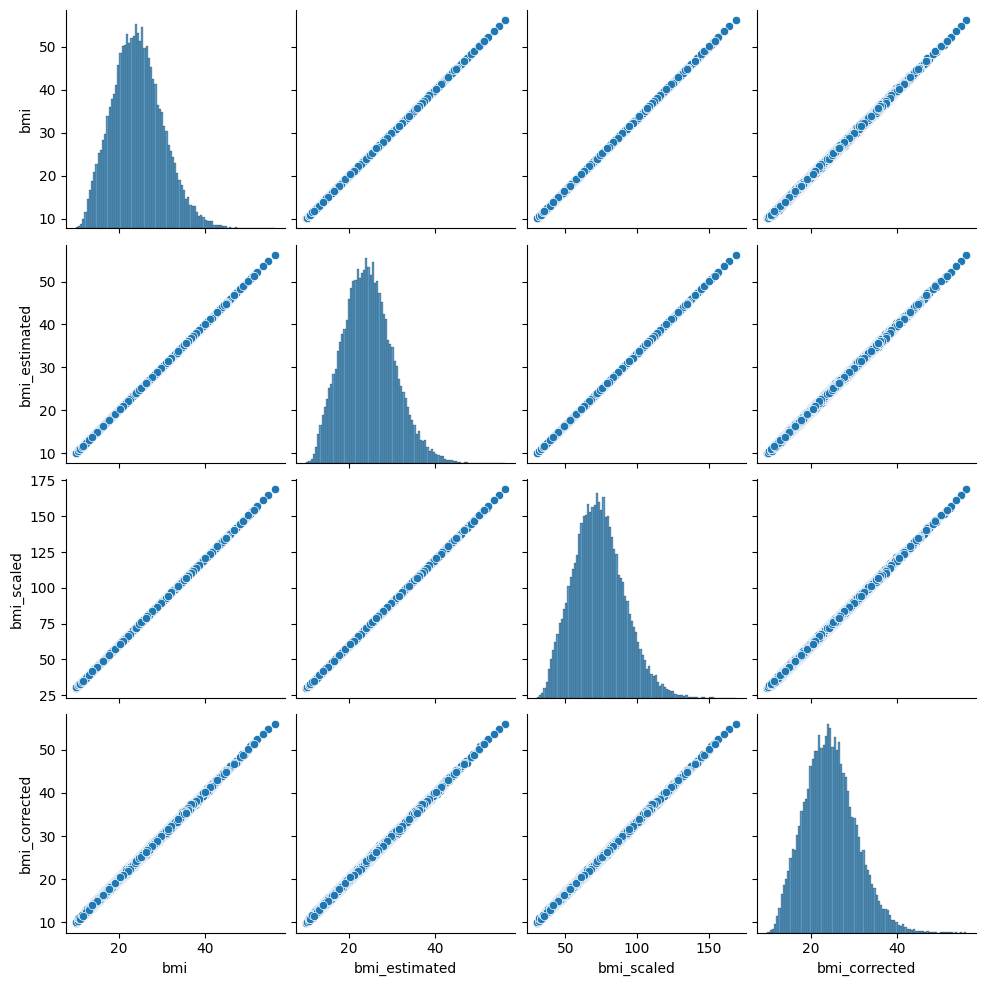

In [31]:
bmi_ = ['bmi', 'bmi_estimated', 'bmi_scaled', 'bmi_corrected']

# Plot all at once
sns.pairplot(df[bmi_])
plt.show()

In [32]:
df = df.drop(['bmi_corrected', 'bmi_scaled', 'bmi_estimated'], axis =1)
df

,age,gender,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,smoking_level,water_intake,screen_time,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,family_history,pet_owner,electrolyte_level,environmental_risk_score,daily_supplement_dosage,target
0,22,Female,162.932524,67.564516,25.450898,97.087870,132.151511,99.337130,189.196300,108.626249,15.046376,6.876157,Excellent,10.422726,3.111490,8368.383309,1850.596805,97.463847,Light,2.973462,2.921232,5,10,No,Master,Labor,Farmer,2857.320235,Keto,Cardio,High,Poor,Yes,Low,2,No,No,0,5.5,1.336250,healthy
1,47,Female,171.547964,52.804671,17.943254,95.888834,116.171940,67.499438,195.072178,120.528981,8.255944,6.456177,Fair,7.787357,3.231989,7938.704919,1864.938695,51.709036,Non-smoker,1.259687,4.832610,4,3,Yes,Bachelor,Healthcare,Farmer,6548.228475,Vegan,Cardio,Moderate,Poor,No,High,3,Yes,Yes,0,5.5,1.180061,diseased
2,55,Female,170.966555,44.804159,15.328371,77.344088,127.030570,63.610472,159.772494,99.224745,15.843748,7.320258,Fair,6.544831,6.138907,5673.534557,1759.140043,38.845329,Heavy,2.316328,4.982927,0,9,No,Bachelor,Tech,Teacher,2549.965306,Keto,Mixed,High,Good,Yes,High,2,No,Yes,0,5.5,2.321793,diseased
3,27,Female,178.287821,40.000000,12.583940,61.743057,123.106043,91.380544,212.788297,75.391804,4.965942,4.487325,Poor,8.634154,1.934497,6233.281463,2291.912789,54.846048,Light,2.502264,10.780279,4,0,No,Bachelor,Unemployed,Farmer,2322.460226,Vegetarian,Mixed,Low,Good,No,Moderate,3,Yes,Yes,0,5.5,-3.495835,diseased
4,24,Female,194.568973,84.264569,22.258599,91.287708,130.915270,64.180530,197.776095,93.184091,14.990514,3.511518,Good,4.874924,4.135976,10956.957845,2386.572024,83.220557,Non-smoker,2.174174,5.453455,5,2,No,Bachelor,Unemployed,Teacher,4742.466750,Vegan,Cardio,High,Poor,No,High,4,Yes,No,0,5.5,-4.914426,healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,53,Male,162.682355,89.601849,33.856033,89.488454,129.380077,76.063089,198.522946,81.855581,11.018841,8.087586,Good,7.176379,2.398722,8514.470177,2343.205984,51.156766,Non-smoker,2.989209,7.415820,2,3,No,Bachelor,Tech,Engineer,877.435530,Vegetarian,Cardio,Moderate,Good,Yes,Low,4,No,No,0,5.5,5.154871,diseased
29996,23,Male,160.250212,67.624275,26.333307,87.209088,100.658001,65.561732,220.064925,146.131691,17.212978,9.842056,Fair,5.832487,4.131165,6800.657789,2381.888802,42.161263,Heavy,2.366341,7.491023,10,8,No,Bachelor,Unemployed,Artist,5407.141861,Vegan,Mixed,Low,Moderate,No,High,1,Yes,No,0,5.5,-8.199162,healthy
29997,68,Male,174.657371,61.878333,20.284522,79.151644,114.879480,61.500441,250.293758,105.553492,14.990514,9.021386,Good,5.583392,0.656181,5931.188675,1741.230691,23.744050,Light,1.521417,7.955565,10,9,Yes,High School,Tech,Driver,2464.960044,Vegan,Strength,Moderate,Moderate,Yes,High,3,Yes,Yes,0,5.5,5.205425,healthy
29998,73,Male,168.392397,46.486714,16.393961,71.186494,120.111696,79.535017,187.587866,117.829075,20.562741,5.467089,Fair,8.705341,3.092682,10499.236717,2134.074080,45.629988,Light,1.914931,10.511659,1,9,No,Master,Labor,Engineer,7588.911079,Vegan,Mixed,Low,Poor,Yes,High,2,Yes,No,0,5.5,7.205557,healthy


In [33]:
df['electrolyte_level'].describe()

count    30000.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: electrolyte_level, dtype: float64

In [34]:
df = df.drop('electrolyte_level', axis =1)

In [35]:
df.describe()

,age,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,water_intake,screen_time,stress_level,mental_health_score,income,meals_per_day,environmental_risk_score,daily_supplement_dosage
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.0,30000.000000
mean,48.608800,170.009869,70.031260,24.483047,85.056374,120.022215,74.919726,190.123980,99.899929,15.011209,7.022141,7.987440,3.049412,6837.429247,2201.278593,59.923003,2.011123,6.024522,4.977533,5.037467,3978.900007,2.997633,5.5,0.011620
std,17.924804,9.926014,14.675520,5.932454,12.046838,14.459350,9.260137,29.969603,19.941652,4.581108,1.496812,1.999047,1.895934,2460.162981,397.562325,20.024036,0.690944,2.931480,3.138060,3.167964,1859.572525,1.419728,0.0,5.755123
min,18.000000,140.000000,40.000000,10.014093,34.093185,60.605842,34.745092,67.641494,18.123387,-5.227445,3.000000,0.000000,0.000000,1000.000000,621.448191,-27.882444,0.500000,0.000000,0.000000,0.000000,500.000000,1.000000,5.5,-9.999895
25%,33.000000,163.279191,59.907063,20.271055,76.880618,110.867877,69.500709,169.968677,86.345592,12.348041,6.004090,6.623345,1.641613,5000.000000,1935.377930,46.291489,1.532278,3.999436,2.000000,2.000000,2770.638397,2.000000,5.5,-4.982281
50%,49.000000,169.992366,69.964131,24.176267,85.144711,120.111696,75.014065,189.978162,100.003267,14.990514,7.019170,8.003487,2.972553,6693.000144,2198.963563,59.831667,2.007112,6.002647,5.000000,5.000000,3746.911451,3.000000,5.5,0.007183
75%,64.000000,176.698425,79.930583,28.248813,93.146838,129.115435,80.385090,210.380718,113.362198,17.704339,8.045421,9.340262,4.337411,8523.239794,2466.964918,73.449395,2.480434,8.016445,8.000000,8.000000,5208.855516,4.000000,5.5,4.986622
max,79.000000,210.000000,133.799980,56.286478,133.153631,182.799505,113.699566,319.875613,179.855753,35.464749,12.000000,16.000000,11.324625,16521.256223,3787.124430,134.872387,5.000000,16.000000,10.000000,10.000000,11349.443420,5.000000,5.5,9.999327


       environmental_risk_score
count                   30000.0
mean                        5.5
std                         0.0
min                         5.5
25%                         5.5
50%                         5.5
75%                         5.5
max                         5.5
Axes(0.125,0.11;0.775x0.77)


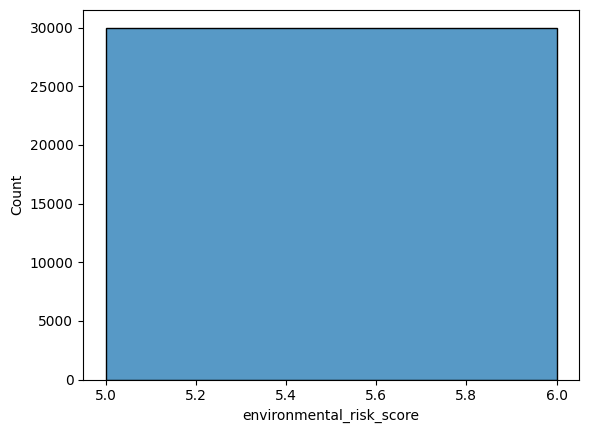

In [36]:
print(pd.DataFrame(df['environmental_risk_score'].describe()))

print(sns.histplot(data = df, x='environmental_risk_score'))

In [38]:
df = df.drop(['environmental_risk_score','daily_supplement_dosage'], axis =1)

In [39]:
df.describe(include='all')

,age,gender,height,weight,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,smoking_level,water_intake,screen_time,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,family_history,pet_owner,target
count,30000.000000,30000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000,30000.000000,30000.000000,30000.000000,30000.000000,30000,30000,30000,30000,30000.000000,30000,30000,30000,30000,30000,30000,30000.000000,30000,30000,30000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,2,4,6,6,NaN,4,3,3,3,2,3,NaN,2,2,2
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Excellent,NaN,NaN,NaN,NaN,NaN,Non-smoker,NaN,NaN,NaN,NaN,No,Bachelor,Unemployed,Farmer,NaN,Vegetarian,Mixed,High,Good,Yes,Low,NaN,No,No,healthy
freq,NaN,15018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7522,NaN,NaN,NaN,NaN,NaN,10092,NaN,NaN,NaN,NaN,15111,7631,5063,5086,NaN,7593,15070,10070,10126,15030,10016,NaN,15076,15211,16500
mean,48.608800,NaN,170.009869,70.031260,24.483047,85.056374,120.022215,74.919726,190.123980,99.899929,15.011209,7.022141,NaN,7.987440,3.049412,6837.429247,2201.278593,59.923003,NaN,2.011123,6.024522,4.977533,5.037467,NaN,NaN,NaN,NaN,3978.900007,NaN,NaN,NaN,NaN,NaN,NaN,2.997633,NaN,NaN,NaN
std,17.924804,NaN,9.926014,14.675520,5.932454,12.046838,14.459350,9.260137,29.969603,19.941652,4.581108,1.496812,NaN,1.999047,1.895934,2460.162981,397.562325,20.024036,NaN,0.690944,2.931480,3.138060,3.167964,NaN,NaN,NaN,NaN,1859.572525,NaN,NaN,NaN,NaN,NaN,NaN,1.419728,NaN,NaN,NaN
min,18.000000,NaN,140.000000,40.000000,10.014093,34.093185,60.605842,34.745092,67.641494,18.123387,-5.227445,3.000000,NaN,0.000000,0.000000,1000.000000,621.448191,-27.882444,NaN,0.500000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,500.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,33.000000,NaN,163.279191,59.907063,20.271055,76.880618,110.867877,69.500709,169.968677,86.345592,12.348041,6.004090,NaN,6.623345,1.641613,5000.000000,1935.377930,46.291489,NaN,1.532278,3.999436,2.000000,2.000000,NaN,NaN,NaN,NaN,2770.638397,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
50%,49.000000,NaN,169.992366,69.964131,24.176267,85.144711,120.111696,75.014065,189.978162,100.003267,14.990514,7.019170,NaN,8.003487,2.972553,6693.000144,2198.963563,59.831667,NaN,2.007112,6.002647,5.000000,5.000000,NaN,NaN,NaN,NaN,3746.911451,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN
75%,64.000000,NaN,176.698425,79.930583,28.248813,93.146838,129.115435,80.385090,210.380718,113.362198,17.704339,8.045421,NaN,9.340262,4.337411,8523.239794,2466.964918,73.449395,NaN,2.480434,8.016445,8.000000,8.000000,NaN,NaN,NaN,NaN,5208.855516,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN


In [40]:
df['smoking_level'].value_counts()

smoking_level
Non-smoker    10092
Heavy          9965
Light          9943
Name: count, dtype: int64

In [41]:
df['sugar_intake'].describe()

count    30000.000000
mean        59.923003
std         20.024036
min        -27.882444
25%         46.291489
50%         59.831667
75%         73.449395
max        134.872387
Name: sugar_intake, dtype: float64

<Axes: xlabel='sugar_intake'>

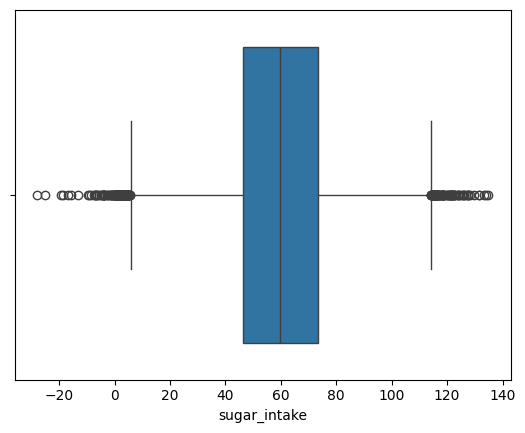

In [42]:
sns.boxplot(data =df, x = 'sugar_intake')

*Sugar Intake can not be negative*

In [43]:
(df['sugar_intake'] < 0).sum()

np.int64(41)

In [44]:
df['sugar_intake'] = df['sugar_intake'].apply(lambda x: x if x >= 0 else np.nan)
# Replace with mean of valid values
mean_val = df[df['sugar_intake'] >= 0]['sugar_intake'].median()
df['sugar_intake'] = df['sugar_intake'].apply(lambda x: x if x >= 0 else mean_val)

<Axes: xlabel='sugar_intake'>

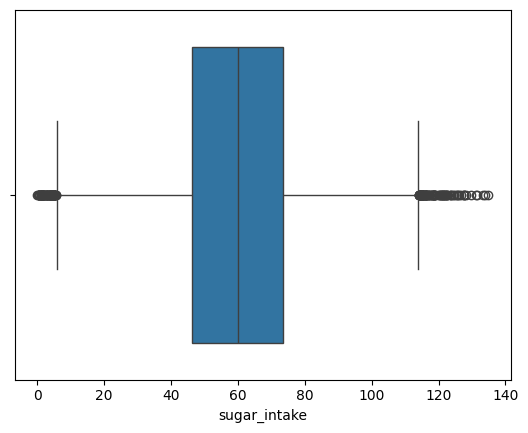

In [45]:
sns.boxplot(data =df, x = 'sugar_intake')

In [46]:
df['screen_time'].describe()

count    30000.000000
mean         6.024522
std          2.931480
min          0.000000
25%          3.999436
50%          6.002647
75%          8.016445
max         16.000000
Name: screen_time, dtype: float64

In [47]:
df['diet_type'].value_counts()

diet_type
Vegetarian    7593
Vegan         7581
Omnivore      7508
Keto          7318
Name: count, dtype: int64

In [48]:
df['family_history'].value_counts()

family_history
No     15076
Yes    14924
Name: count, dtype: int64